First 5 rows of the dataset:
   Patient_ID  Age  Gender  Systolic_BP  Diastolic_BP  Heart_Rate   BMI  \
0           1   69    Male        128.8          96.8        64.5  26.1   
1           2   32    Male        139.7          74.5        64.3   NaN   
2           3   89  Female        150.0          85.7        84.5  24.2   
3           4   78  Female        140.2          96.3        92.1  29.1   
4           5   38    Male         97.4          76.2        74.0  26.5   

   Fasting_Glucose  Cholesterol Smoker Diabetic  Hospital_Visits    Outcome  
0             91.6        230.3     No       No                0    Ongoing  
1            108.6        151.1    Yes       No                2  Recovered  
2            138.9        201.5    Yes      Yes                0  Recovered  
3              NaN        227.8     No       No                1  Recovered  
4            110.4        195.4    Yes       No                0  Recovered  

Dataset Information:
<class 'pandas.core.frame.Data

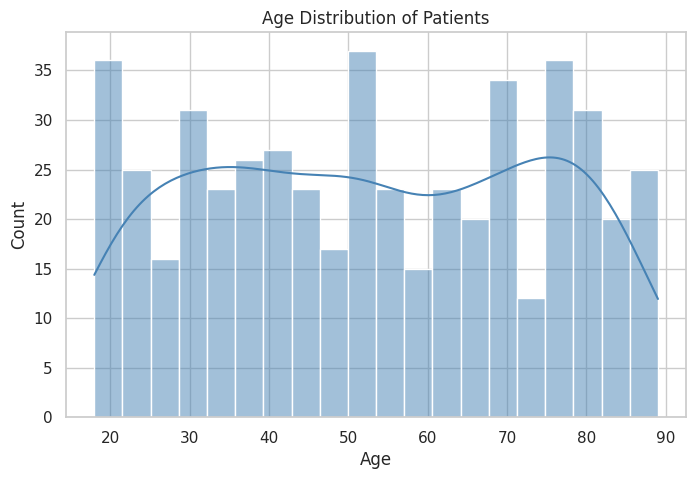

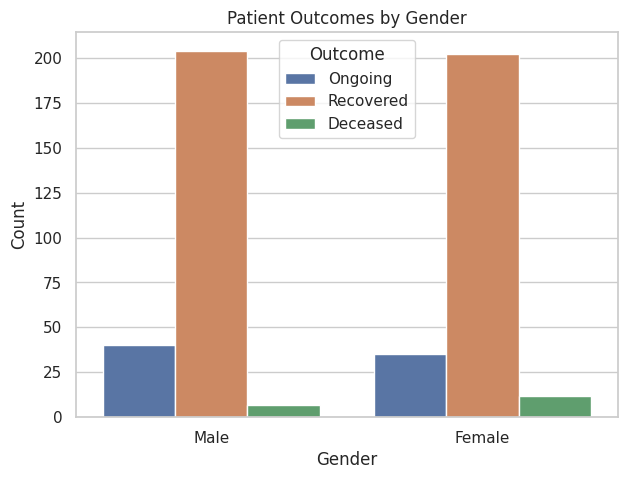

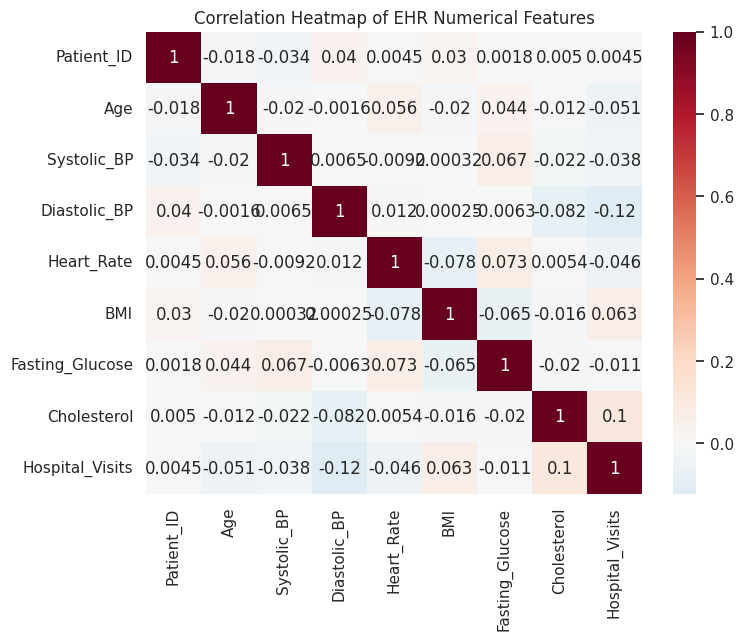

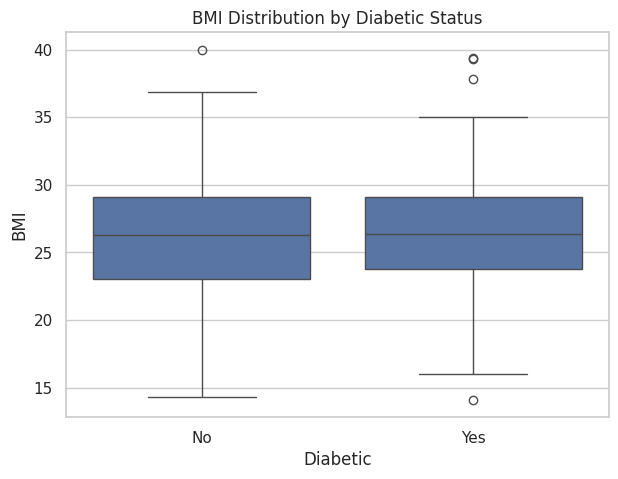

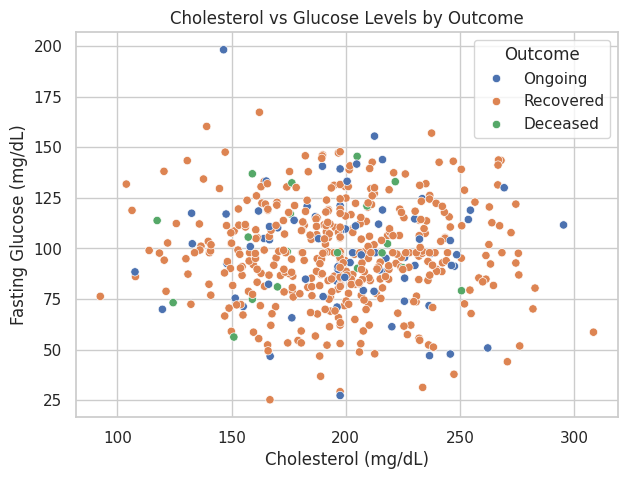

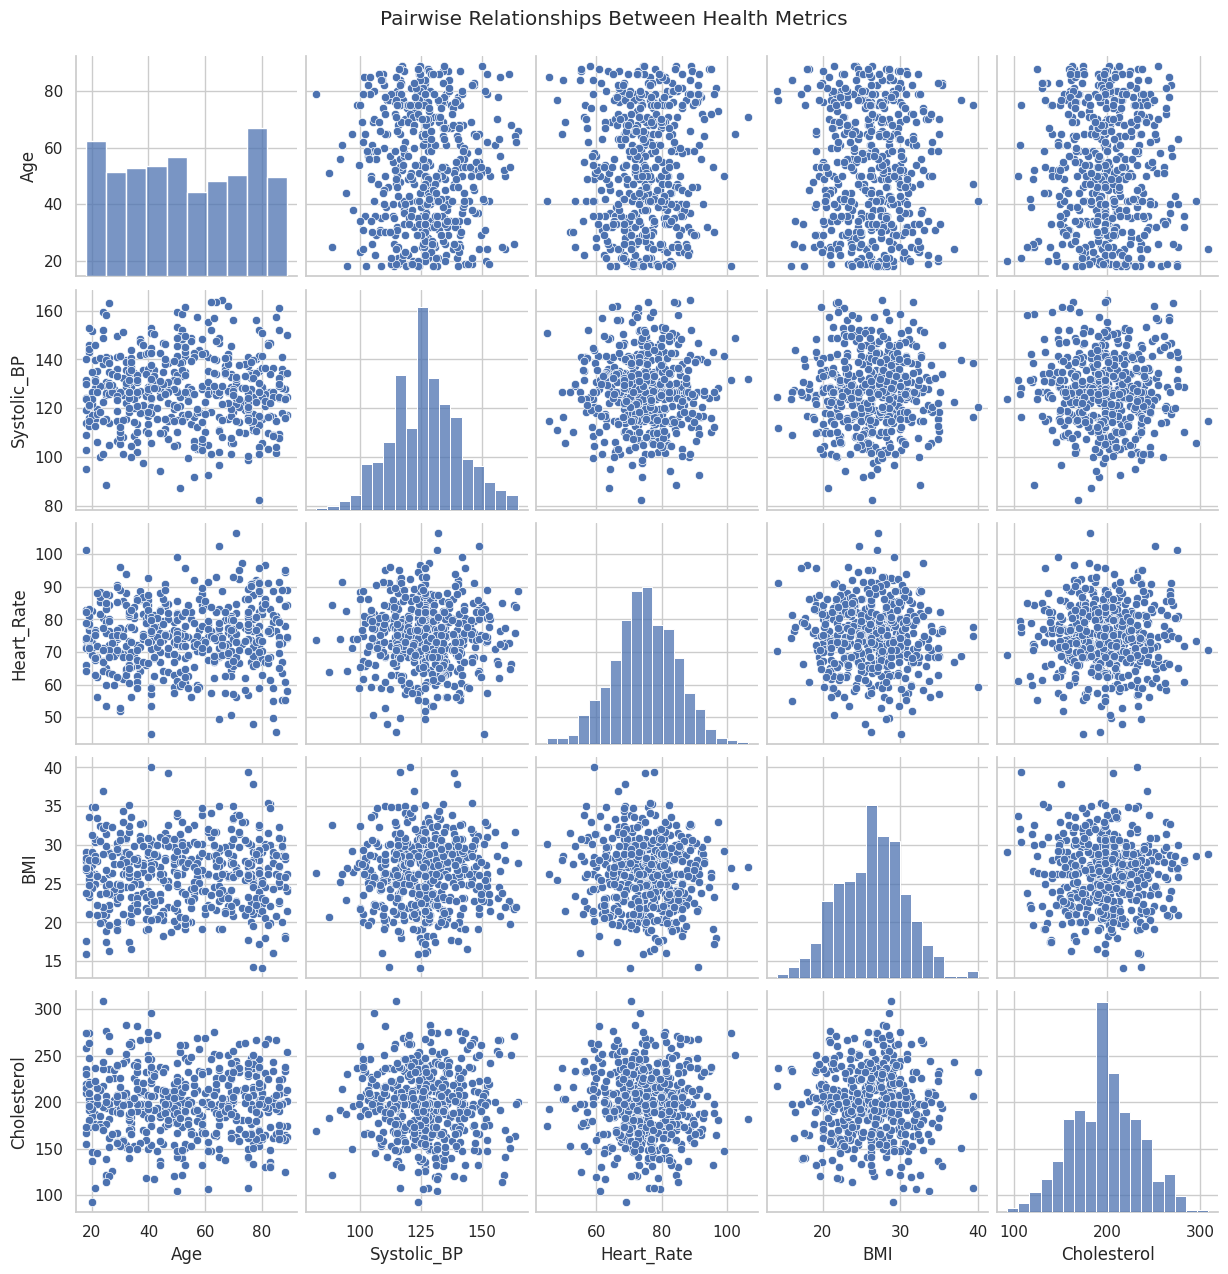

Average Age: 52.93
Average BMI: 26.27
Percentage of Diabetic Patients: 28.2
Correlation between BMI and Cholesterol: -0.016
Mean Systolic BP among Smokers vs Non-Smokers:
Smoker
No     126.732432
Yes    127.154992
Name: Systolic_BP, dtype: float64


In [ ]:

!pip install seaborn matplotlib pandas numpy

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)
n = 500
ehr_data = pd.DataFrame({
    "Patient_ID": np.arange(1, n + 1),
    "Age": np.random.randint(18, 90, n),
    "Gender": np.random.choice(["Male", "Female"], n, p=[0.48, 0.52]),
    "Systolic_BP": np.random.normal(125, 15, n).round(1),
    "Diastolic_BP": np.random.normal(80, 10, n).round(1),
    "Heart_Rate": np.random.normal(75, 10, n).round(1),
    "BMI": np.random.normal(26, 4.5, n).round(1),
    "Fasting_Glucose": np.random.normal(100, 25, n).round(1),
    "Cholesterol": np.random.normal(195, 35, n).round(1),
    "Smoker": np.random.choice(["Yes", "No"], n, p=[0.25, 0.75]),
    "Diabetic": np.random.choice(["Yes", "No"], n, p=[0.28, 0.72]),
    "Hospital_Visits": np.random.poisson(2, n),
    "Outcome": np.random.choice(["Recovered", "Ongoing", "Deceased"], n, p=[0.78, 0.18, 0.04])
})

for col in ["Systolic_BP", "BMI", "Cholesterol", "Fasting_Glucose"]:
    ehr_data.loc[ehr_data.sample(frac=0.05).index, col] = np.nan

print("First 5 rows of the dataset:")
print(ehr_data.head())

print("\nDataset Information:")
print(ehr_data.info())

print("\nSummary Statistics:")
print(ehr_data.describe())

print("\nMissing Values:")
print(ehr_data.isnull().sum())


ehr_data.fillna(ehr_data.mean(numeric_only=True), inplace=True)



sns.set(style="whitegrid")

plt.figure(figsize=(8,5))
sns.histplot(ehr_data["Age"], bins=20, kde=True, color="steelblue")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(7,5))
sns.countplot(x="Gender", hue="Outcome", data=ehr_data)
plt.title("Patient Outcomes by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(ehr_data.select_dtypes(include=np.number).corr(), annot=True, cmap="RdBu_r", center=0)
plt.title("Correlation Heatmap of EHR Numerical Features")
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(x="Diabetic", y="BMI", data=ehr_data)
plt.title("BMI Distribution by Diabetic Status")
plt.xlabel("Diabetic")
plt.ylabel("BMI")
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(x="Cholesterol", y="Fasting_Glucose", hue="Outcome", data=ehr_data)
plt.title("Cholesterol vs Glucose Levels by Outcome")
plt.xlabel("Cholesterol (mg/dL)")
plt.ylabel("Fasting Glucose (mg/dL)")
plt.show()

sns.pairplot(ehr_data[["Age", "Systolic_BP", "Heart_Rate", "BMI", "Cholesterol"]])
plt.suptitle("Pairwise Relationships Between Health Metrics", y=1.02)
plt.show()


print("Average Age:", round(ehr_data["Age"].mean(), 2))
print("Average BMI:", round(ehr_data["BMI"].mean(), 2))
print("Percentage of Diabetic Patients:", round((ehr_data['Diabetic'].value_counts()['Yes'] / n) * 100, 2))
print("Correlation between BMI and Cholesterol:", round(ehr_data["BMI"].corr(ehr_data["Cholesterol"]), 3))
print("Mean Systolic BP among Smokers vs Non-Smokers:")
print(ehr_data.groupby("Smoker")["Systolic_BP"].mean())
